### Step 1: Load and Explore the Data

In [466]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [468]:
data=pd.read_csv("C:\\Users\\niranjana\\Downloads\\heart_disease.csv")

In [470]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1



## Column Overview
Demographics & Personal Info:

age: Age of the patient (29–77 years).  
sex: 1 = Male, 0 = Female.  

### Health Metrics:
trestbps: Resting blood pressure (94–200 mmHg).  
chol: Serum cholesterol (126–564 mg/dl).   
thalach: Maximum heart rate achieved (71–202 bpm).   
oldpeak: ST depression induced by exercise relative to rest (0.0–6.2).     
### Categorical Variables:
cp: Chest pain type (0–3).    
restecg: Resting electrocardiographic results (0–2).       
thal: Thalassemia type (0–3).     
slope: Slope of the peak exercise ST segment (0–2).      
ca: Number of major vessels colored by fluoroscopy (0–4).         
fbs: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False).      
exang: Exercise-induced angina (1 = Yes, 0 = No).        
### Target:
target: Presence of heart disease (1 = Present, 0 = Absent).         

In [473]:
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [475]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [477]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [479]:
data.size

14350

In [481]:
data.shape

(1025, 14)

In [483]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [485]:
data.duplicated().sum()

723

In [487]:
columns_to_check = ['sex', 'cp', 'restecg','thal','target']
for col in columns_to_check:
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Value counts for thal:
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Value counts for target:
target
1    526
0    499
Name: count, dtype: int64



### Exploratory data analysis

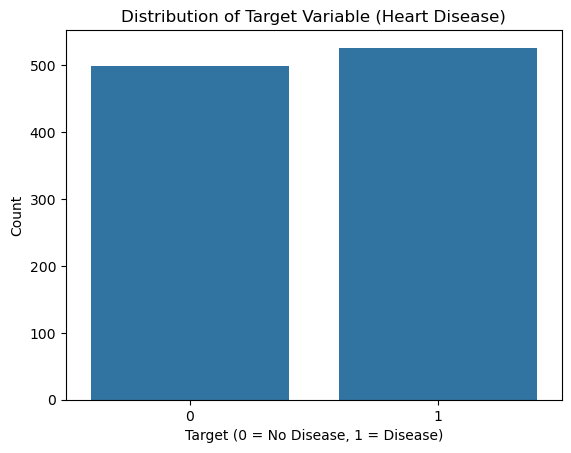

target
1    526
0    499
Name: count, dtype: int64


In [490]:
y= data["target"]

# Plotting the count plot to visualize the distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Printing the count of each class in the target variable
target_temp = data["target"].value_counts()
print(target_temp)


In [492]:
print("Percentage of patience without heart problems: ",(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: ",(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems:  48.68
Percentage of patience with heart problems:  51.32


In [494]:
sex_disease_status = data.groupby(['sex', 'target']).size().unstack(fill_value=0)
print(data['sex'].value_counts())
print(sex_disease_status)


sex
1    713
0    312
Name: count, dtype: int64
target    0    1
sex             
0        86  226
1       413  300


In [496]:
print("Percentage of female patience with heart problems: ",(round(sex_disease_status[1][0]*100/312,2)))
print("Percentage of female patience without heart problems: ",(round(sex_disease_status[0][0]*100/312,2)))
print("Percentage of male patience with heart problems: ",(round(sex_disease_status[1][1]*100/713,2)))
print("Percentage of male patience without heart problems: ",(round(sex_disease_status[0][1]*100/713,2)))

Percentage of female patience with heart problems:  72.44
Percentage of female patience without heart problems:  27.56
Percentage of male patience with heart problems:  42.08
Percentage of male patience without heart problems:  57.92


### Outlier handling

In [499]:
num_data = data[["age", "trestbps", "chol", "thalach", "oldpeak", "slope", "ca"]]
num_data

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,52,125,212,168,1.0,2,2
1,53,140,203,155,3.1,0,0
2,70,145,174,125,2.6,0,0
3,61,148,203,161,0.0,2,1
4,62,138,294,106,1.9,1,3
...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0
1021,60,125,258,141,2.8,1,1
1022,47,110,275,118,1.0,1,1
1023,50,110,254,159,0.0,2,0


In [501]:
cat_data = data[["sex", "cp", "fbs", "restecg", "exang", "thal", "target"]]
cat_data

,sex,cp,fbs,restecg,exang,thal,target
0,1,0,0,1,0,3,0
1,1,0,1,0,1,3,0
2,1,0,0,1,1,3,0
3,1,0,0,1,0,3,0
4,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...
1020,1,1,0,1,1,2,1
1021,1,0,0,0,1,3,0
1022,1,0,0,0,1,2,0
1023,0,0,0,0,0,2,1


In [503]:
print('Numerical columns are')
num_cols=num_data.columns.tolist()
print(num_cols)

Numerical columns are
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']


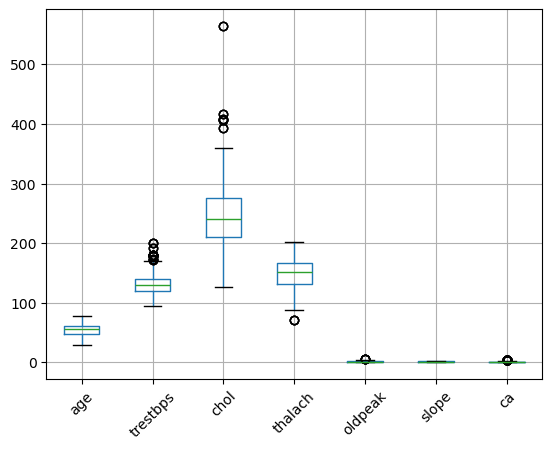

In [505]:
num_data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [507]:
def remove_outliers (data,column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    data[column_name] =   data[column_name].clip(upper = upper_bound)
    data[column_name] =   data[column_name].clip(lower = lower_bound)
    return data[column_name]

In [509]:
for col in num_cols:
    num_data[col] = remove_outliers(num_data,col)

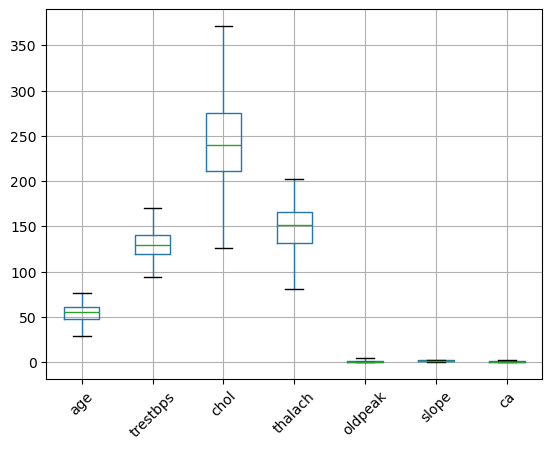

In [511]:
num_data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [513]:
data = pd.concat([num_data,cat_data], axis = 1)

In [515]:
data

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,125,212,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,140,203,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,145,174,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,148,203,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,138,294,106,1.9,1,2.5,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0.0,1,1,0,1,1,2,1
1021,60,125,258,141,2.8,1,1.0,1,0,0,0,1,3,0
1022,47,110,275,118,1.0,1,1.0,1,0,0,0,1,2,0
1023,50,110,254,159,0.0,2,0.0,0,0,0,0,0,2,1


## Scaling

In [518]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler= StandardScaler()
min_max = MinMaxScaler()

In [520]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'sex',
       'cp', 'fbs', 'restecg', 'exang', 'thal', 'target'],
      dtype='object')

In [522]:
numerical_cols = ['trestbps','chol','thalach','oldpeak']

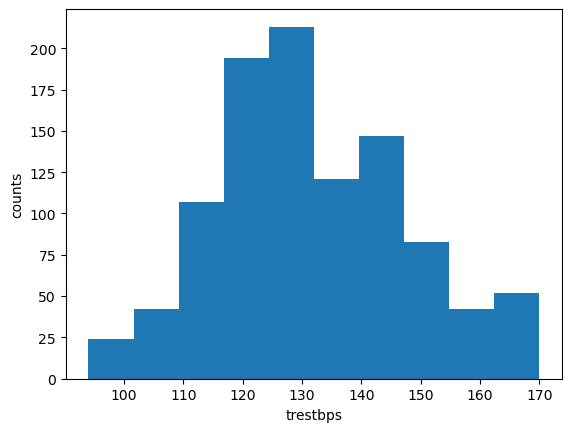

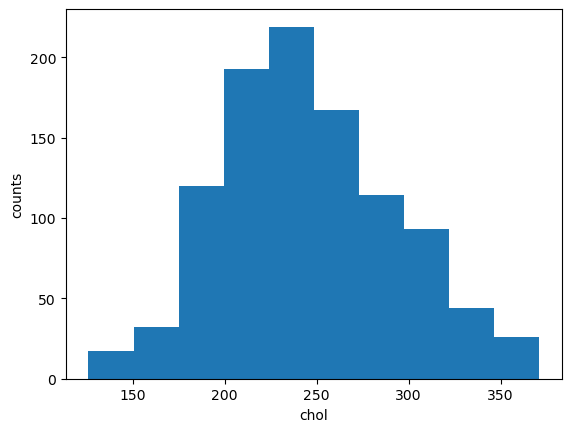

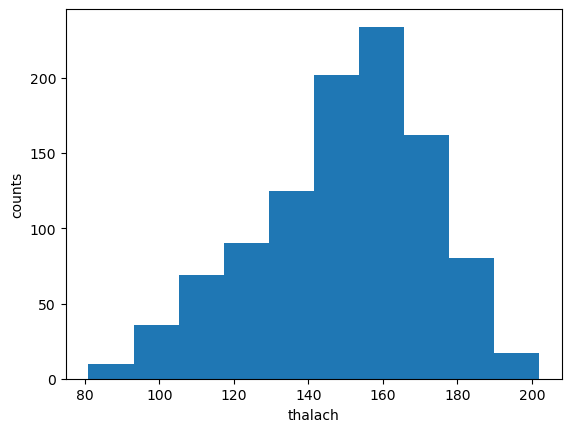

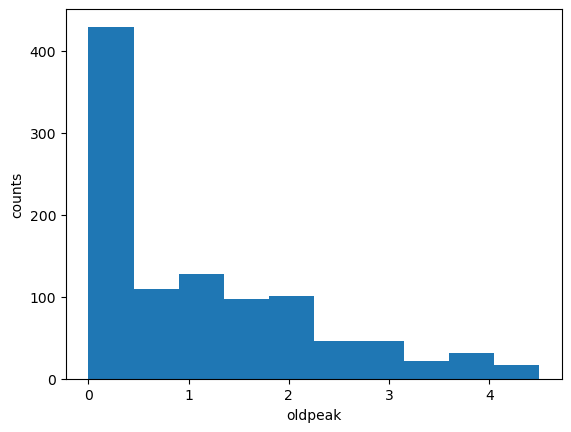

In [524]:
for col in numerical_cols :
    plt.hist(num_data[col])
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

In [526]:
std_cols = ['trestbps','chol']

In [528]:
df[std_cols]= std_scaler.fit_transform(df[std_cols])
data.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,125,212,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,140,203,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,145,174,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,148,203,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,138,294,106,1.9,1,2.5,0,0,1,1,0,2,0


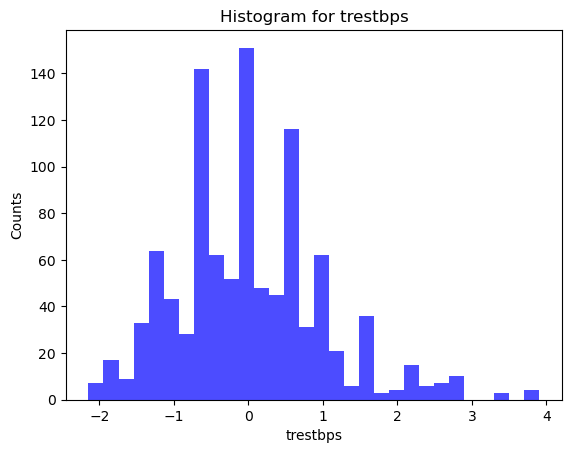

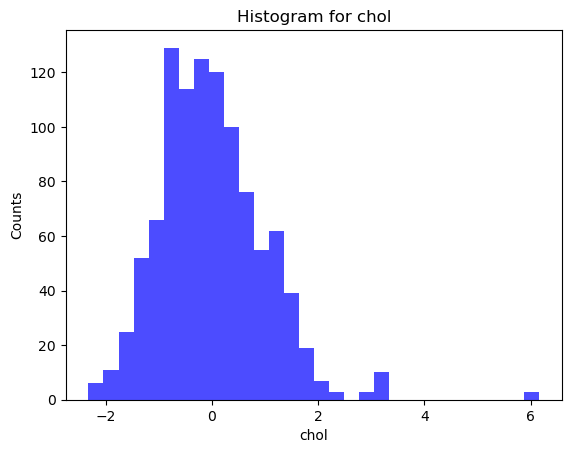

In [530]:
for col in std_cols:
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

In [532]:
min_cols = ['thalach','oldpeak']

In [534]:
df[min_cols] = min_max.fit_transform(df[min_cols])
data.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,125,212,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,140,203,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,145,174,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,148,203,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,138,294,106,1.9,1,2.5,0,0,1,1,0,2,0


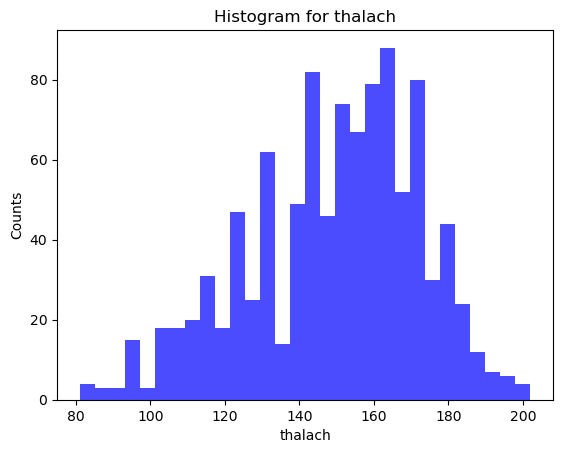

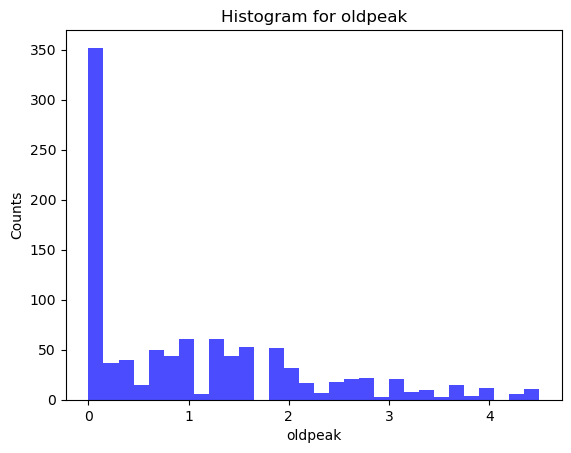

In [536]:
for col in min_cols:
    plt.hist(data[col], bins=30, color='blue', alpha=0.7)  # Accessing the column from the DataFrame
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

In [538]:
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.377636,-0.659332,0.719008,0.161290,2,2,1,0,0,1,0,3,0
1,53,0.479107,-0.833861,0.611570,0.500000,0,0,1,0,1,0,1,3,0
2,70,0.764688,-1.396233,0.363636,0.419355,0,0,1,0,0,1,1,3,0
3,61,0.936037,-0.833861,0.661157,0.000000,2,1,1,0,0,1,0,3,0
4,62,0.364875,0.930822,0.206612,0.306452,1,3,0,0,1,1,0,2,0


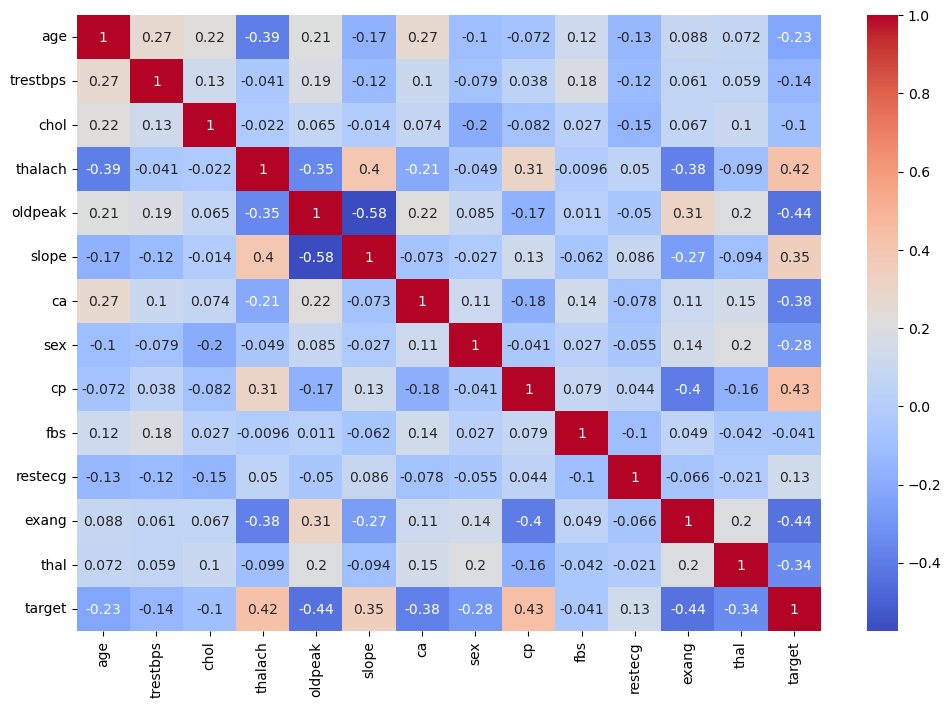

In [540]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm')
plt.show()

### Positive Correlation   
Older age is linked to higher CA levels.           
Higher thalach (heart rate) is associated with a positive target outcome.   
Chest pain (cp) increases the likelihood of a positive target outcome.    
cp, thalach, and slope together are strong indicators of the target outcome.   

## Negative Correlation  
Older age is negatively correlated with thalach (heart rate).  
Higher oldpeak is linked to a lower likelihood of a positive target outcome.   
A steeper slope is associated with a lower oldpeak.   
CA is negatively correlated with a positive target outcome. 
Chest pain (cp) and exercise-induced angina (exang) are inversely related.   
Exang and target, as well as cp, are negatively correlated.   
Thalach, exang, sex, CA, and oldpeak are all negatively associated with a positive target outcome.

### Train-Test Split

In [545]:
from sklearn.model_selection import train_test_split

In [547]:
y= df['chol']
X = df.drop("chol",axis = 1)

In [549]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

### Regression:

In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
model = LinearRegression()

In [554]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [556]:
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 1.0126785460500218
R2 score : 0.15058775489968856


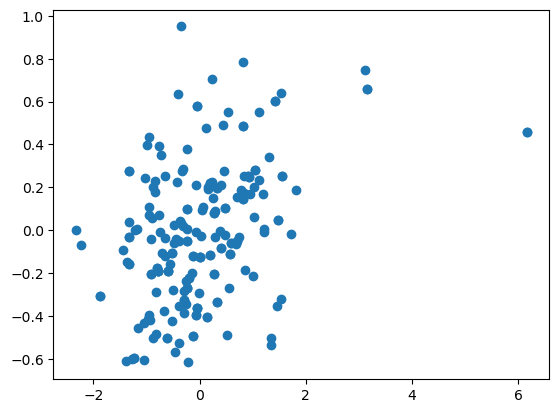

In [558]:
plt.scatter(y_test, y_pred)

### Classification
#### Logistic regression

In [561]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score

In [563]:
y= data['target']
X = data.drop("target",axis = 1)

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [567]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [569]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.8311688311688312
precision: 0.8424701801933663
recall: 0.8311688311688312
f1_score: 0.8317680544832275


### K-Nearest Neighbors (KNN)

In [572]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

In [574]:
print('accuracy:',accuracy_score(y_pred_Knn,y_test))
print('precision:',precision_score(y_pred_Knn,y_test,average='weighted'))
print('recall:',recall_score(y_pred_Knn,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_Knn,y_test,average='weighted'))

accuracy: 0.7207792207792207
precision: 0.7223004297209691
recall: 0.7207792207792207
f1_score: 0.7207792207792207


### Naive Bayes

In [577]:
from sklearn.naive_bayes import GaussianNB

In [579]:
nb_classifier = GaussianNB()

In [581]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [583]:
y_pred_NB = nb_classifier.predict(X_test)

In [585]:
print('accuracy:',accuracy_score(y_pred_NB,y_test))
print('precision:',precision_score(y_pred_NB,y_test,average='weighted'))
print('recall:',recall_score(y_pred_NB,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_NB,y_test,average='weighted'))

accuracy: 0.827922077922078
precision: 0.8402048122828166
recall: 0.827922077922078
f1_score: 0.8286039238923356


# Accuracy:

- K-Nearest Neighbors (KNN) has the highest accuracy at 86.7%, followed by Naive Bayes (82.8%) and Logistic Regression (82.1%).
- This suggests KNN performs better overall in correctly classifying instances.
- 
# Precision:
- Precision measures how well the model avoids **false positives**.
- KNN has the highest precision (86.8%), indicating it is the best at ensuring positive predictions are correct.
- Naive Bayes and Logistic Regression follow closely at 84.0% and 83.3%, respectively.
- 
# Recall:
- Recall measures how well the model identifies all **positive instances**.
- KNN again leads at 86.7%, followed by Naive Bayes (82.8%) and Logistic Regression (82.1%).
  
# F1-Score:
- The F1-score balances **precision and recall**.
- KNN has the highest F1-score (86.7%), making it the most balanced model for this task.
- Naive Bayes (82.9%) and Logistic Regression (82.2%) are close but slightly less balanced.
